In [1]:
import pandas as pd

Importing train dataset:

In [2]:
X = pd.read_csv('data/train.csv', delimiter=',')

In [3]:
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import matplotlib.pyplot as plt

In [5]:
Y = X['Survived']
X = X.drop(columns=['PassengerId', 'Name', 'Ticket'])

Exploratory data analysis:

In [6]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Doing a deep study about cabin and the relation with survived:

In [7]:
for idx, row in X.iterrows():
    if len(str(row['Cabin']).split(' ')) > 1:
        print("simblings: {} -> cabin: {}".format(row['SibSp'], row['Cabin']))

simblings: 3 -> cabin: C23 C25 C27
simblings: 0 -> cabin: F G73
simblings: 3 -> cabin: C23 C25 C27
simblings: 0 -> cabin: D10 D12
simblings: 0 -> cabin: B58 B60
simblings: 1 -> cabin: F E69
simblings: 1 -> cabin: C22 C26
simblings: 0 -> cabin: B58 B60
simblings: 1 -> cabin: C22 C26
simblings: 2 -> cabin: B57 B59 B63 B66
simblings: 3 -> cabin: C23 C25 C27
simblings: 1 -> cabin: B96 B98
simblings: 1 -> cabin: B96 B98
simblings: 1 -> cabin: C23 C25 C27
simblings: 1 -> cabin: C22 C26
simblings: 0 -> cabin: B51 B53 B55
simblings: 0 -> cabin: F G63
simblings: 1 -> cabin: C62 C64
simblings: 0 -> cabin: F G73
simblings: 2 -> cabin: B57 B59 B63 B66
simblings: 1 -> cabin: B96 B98
simblings: 0 -> cabin: B82 B84
simblings: 1 -> cabin: B96 B98
simblings: 0 -> cabin: B51 B53 B55


In [8]:
cabin_data = X[~X['Cabin'].isnull()]
cabin_data = cabin_data[cabin_data['Cabin'].str.contains('B')]
cabin_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
31,1,1,female,NaN,1,0,146.5208,B78,C
54,0,1,male,65.0,0,1,61.9792,B30,C
61,1,1,female,38.0,0,0,80.0000,B28,NaN
118,0,1,male,24.0,0,1,247.5208,B58 B60,C
139,0,1,male,24.0,0,0,79.2000,B86,C
170,0,1,male,61.0,0,0,33.5000,B19,S
194,1,1,female,44.0,0,0,27.7208,B4,C
195,1,1,female,58.0,0,0,146.5208,B80,C
257,1,1,female,30.0,0,0,86.5000,B77,S
263,0,1,male,40.0,0,0,0.0000,B94,S


In [9]:
cabin_data = cabin_data[['Survived', 'Fare', 'Cabin']]
cabin_data = cabin_data.copy()

In [10]:
cabin_data['Cabin'] = cabin_data['Cabin'].str.split('B').str[-1]

In [11]:
cabin_data['Cabin'] = cabin_data['Cabin'].astype('int')

In [12]:
cabin_data

,Survived,Fare,Cabin
31,1,146.5208,78
54,0,61.9792,30
61,1,80.0000,28
118,0,247.5208,60
139,0,79.2000,86
170,0,33.5000,19
194,1,27.7208,4
195,1,146.5208,80
257,1,86.5000,77
263,0,0.0000,94


In [13]:
cabin_data = cabin_data.drop_duplicates().sort_values(by=['Cabin'])
cabin_data

,Survived,Fare,Cabin
779,1,211.3375,3
194,1,27.7208,4
689,1,211.3375,5
329,1,57.9792,18
170,0,33.5000,19
690,1,57.0000,20
745,0,71.0000,22
540,1,71.0000,22
61,1,80.0000,28
54,0,61.9792,30


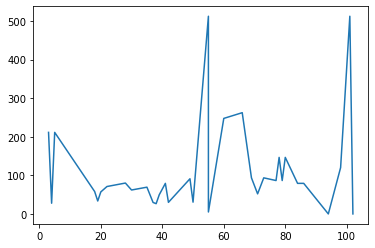

In [14]:
plt.plot(cabin_data['Cabin'], cabin_data['Fare'])

Ok, B-deck cabin number do not seems to be related with the passenger fare. But lets see if it is related with the survived condition:

In [15]:
survived_cabins = cabin_data.query('Survived == 1')

<AxesSubplot:>

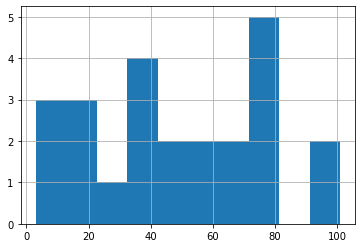

In [16]:
survived_cabins.Cabin.hist()

<AxesSubplot:>

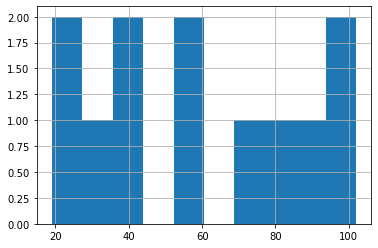

In [17]:
died_cabins = cabin_data.query('Survived == 0')
died_cabins.Cabin.hist()

It seems that cabin and survived do not have a visible relation. Lets drop this column and proceed with the exploratory data analysis.

In [18]:
X = X.drop(columns=['Cabin'])

In [19]:
X.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
survived_data = X.query('Survived == 1')
died_data = X.query('Survived == 0')

In [21]:
survived_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [22]:
died_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


<AxesSubplot:>

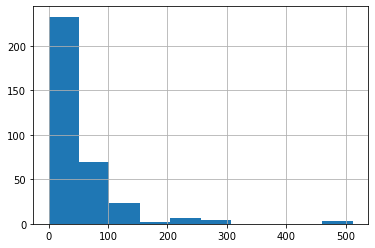

In [23]:
survived_data.Fare.hist()

In [24]:
survived_data.Fare

1      71.2833
2       7.9250
3      53.1000
8      11.1333
9      30.0708
        ...   
875     7.2250
879    83.1583
880    26.0000
887    30.0000
889    30.0000
Name: Fare, Length: 342, dtype: float64

<AxesSubplot:>

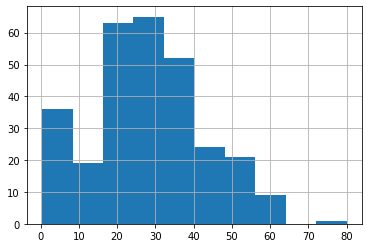

In [25]:
survived_data.Age.hist()

In [26]:
survived_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C
879,1,1,female,56.0,0,1,83.1583,C
880,1,2,female,25.0,0,1,26.0000,S
887,1,1,female,19.0,0,0,30.0000,S


<AxesSubplot:>

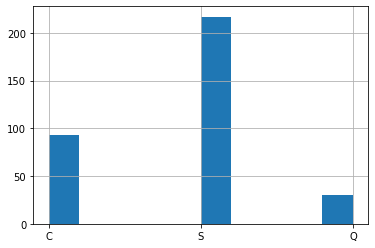

In [27]:
survived_data.Embarked.hist()

<AxesSubplot:>

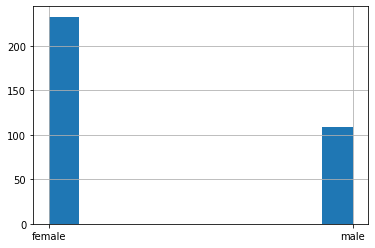

In [28]:
survived_data.Sex.hist()

<AxesSubplot:>

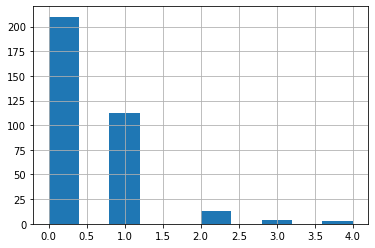

In [29]:
survived_data.SibSp.hist()

<AxesSubplot:>

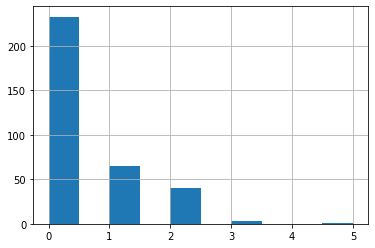

In [30]:
survived_data.Parch.hist()

In [31]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [32]:
X

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [33]:
X = pd.get_dummies(X)

In [34]:
X = X[~X.isna().any(axis=1)]
X

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0,0,1,0
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


Using random forest scikit learn implementation to predict labels:

In [35]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X.drop(columns=['Survived']), X['Survived'])

RandomForestClassifier(max_depth=2, random_state=0)

In [40]:
test = pd.read_csv('data/test.csv', delimiter=',')
test = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test = pd.get_dummies(test)
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,1,0,0,1
414,1,39.0,0,0,108.9000,1,0,1,0,0
415,3,38.5,0,0,7.2500,0,1,0,0,1
416,3,NaN,0,0,8.0500,0,1,0,0,1


In [42]:
clf.predict(test[~test.isna().any(axis=1)])

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,

In [44]:
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(max_depth=2, random_state=0)
scores = cross_val_score(clf, X.drop(columns=['Survived']), X['Survived'], cv=5)

scores.mean()

0.7717423421648775